# Ejercicios Pair Programming 
## Lección 9 - Regresión Lineal Intro

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

In [4]:
# Librerias
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df = pd.read_csv("supermercado_encoding.csv", index_col=0)

In [3]:
df.head()

,income,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn,marital_status_oe
0,1.608976,-0.701068,0.052191,-1.803407,0.363636,7.0
1,0.264394,-0.701068,0.361131,-0.142553,0.636364,3.0
2,0.757562,-0.701068,-0.256748,-1.388194,0.272727,6.0
3,-0.928642,-0.701068,-1.183568,0.687874,0.090909,5.0
4,-1.461745,-0.170569,-1.183568,0.687874,0.272727,3.0


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

Deberéis separar la X y la y.

Deberéis crear el train y el test.

Ajustar vuestro modelo.

### Dividimos los datos del dataframe entre la variables predictoras y la variable respuesta

In [5]:
X = df.drop("numwebpurchases_sklearn", axis = 1)
y = df["numwebpurchases_sklearn"]

In [6]:
# Comprobamos que la variable X son todas las columnas de las variables predictoras.

X.head(3)

,income,numdealspurchases,numstorepurchases,numwebvisitsmonth,marital_status_oe
0,1.608976,-0.701068,0.052191,-1.803407,7.0
1,0.264394,-0.701068,0.361131,-0.142553,3.0
2,0.757562,-0.701068,-0.256748,-1.388194,6.0


In [16]:
# Comprobamos que la variable "y" es la variable respuesta.

y.head(3)

0    0.363636
1    0.636364
2    0.272727
Name: numwebpurchases_sklearn, dtype: float64

In [8]:
# Ahora dividimos los datos para el entrenamiento y test con un 80/20, es decir, 80% de entrenamiento y 20% de test.  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Iniciamos la regresión lineal. 

lr = LinearRegression(n_jobs=-1)

In [17]:
# Ajustamos el modelo pasándole solo los datos de entrenamiento.

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
# Hacemos las prediciones usando el método predict() de sklearn. Haremos las predicciones tanto para los datos de entrenamiento (x_train)
# como para los datos de test (x_test). 

y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [19]:
# Nos creamos dos Dataframes tanto para los datos de entrenamiento como para los datos de test y los concatenamos para comparar
# los resultados.

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
1150,0.363636,0.506887,Train
386,0.181818,0.310666,Train
1267,0.363636,0.319671,Train
642,0.090909,0.180790,Train
822,0.636364,0.398616,Train


In [20]:
resultados.tail()

,Real,Predicted,Set
446,0.090909,0.146259,Test
625,0.363636,0.430525,Test
1261,0.181818,0.319521,Test
21,0.181818,0.163093,Test
1982,0.454545,0.397671,Test


En estos resultados vemos como está entrenando nuestro modelo y como realiza el test.

In [21]:
# Creamos en el dataframe resultados la columna "residuos" para ver la diferencia entre los valores observados y los que predice
# nuestro modelo, es decir, el error de cálculo.

resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
1150,0.363636,0.506887,Train,-0.143251
386,0.181818,0.310666,Train,-0.128848
1267,0.363636,0.319671,Train,0.043965
642,0.090909,0.180790,Train,-0.089881
822,0.636364,0.398616,Train,0.237748


In [22]:
resultados.tail()

,Real,Predicted,Set,residuos
446,0.090909,0.146259,Test,-0.055350
625,0.363636,0.430525,Test,-0.066889
1261,0.181818,0.319521,Test,-0.137703
21,0.181818,0.163093,Test,0.018725
1982,0.454545,0.397671,Test,0.056874


En el train podemos observar que de cinco valores tomados de ejemplo tres son negativos (se sobreestima nuestra variable respuesta, es decir, se sobreestima el número de compras online, damos por supuesto que van a comprar de lo que en realidad compran) y dos son positivas (se infraestima nuestra variable respuesta, es decir, damos por supuesto que van a comprar menos de lo que compran online). Hay que destacar que los valores de la columna residuos en el train son muy bajos, por lo que la diferencia entre el valor observado y el valor real es mínima.

En el test podemos observar que de cinco valores tomados de ejemplo tres son negativos (se sobreestima nuestra variable respuesta, es decir, se sobreestima el número de compras online, damos por supuesto que van a comprar de lo que en realidad compran) y dos son positivas (se infraestima nuestra variable respuesta, es decir, damos por supuesto que van a comprar menos de lo que compran online). Hay que destacar que los valores de la columna residuos en el train son muy bajos, por lo que la diferencia entre el valor observado y el valor real es mínima.

En conclusión los valores tanto positivos como negativos del train y test están próximos a 0, por lo que nuestro margen de error consideramos que es pequeño.


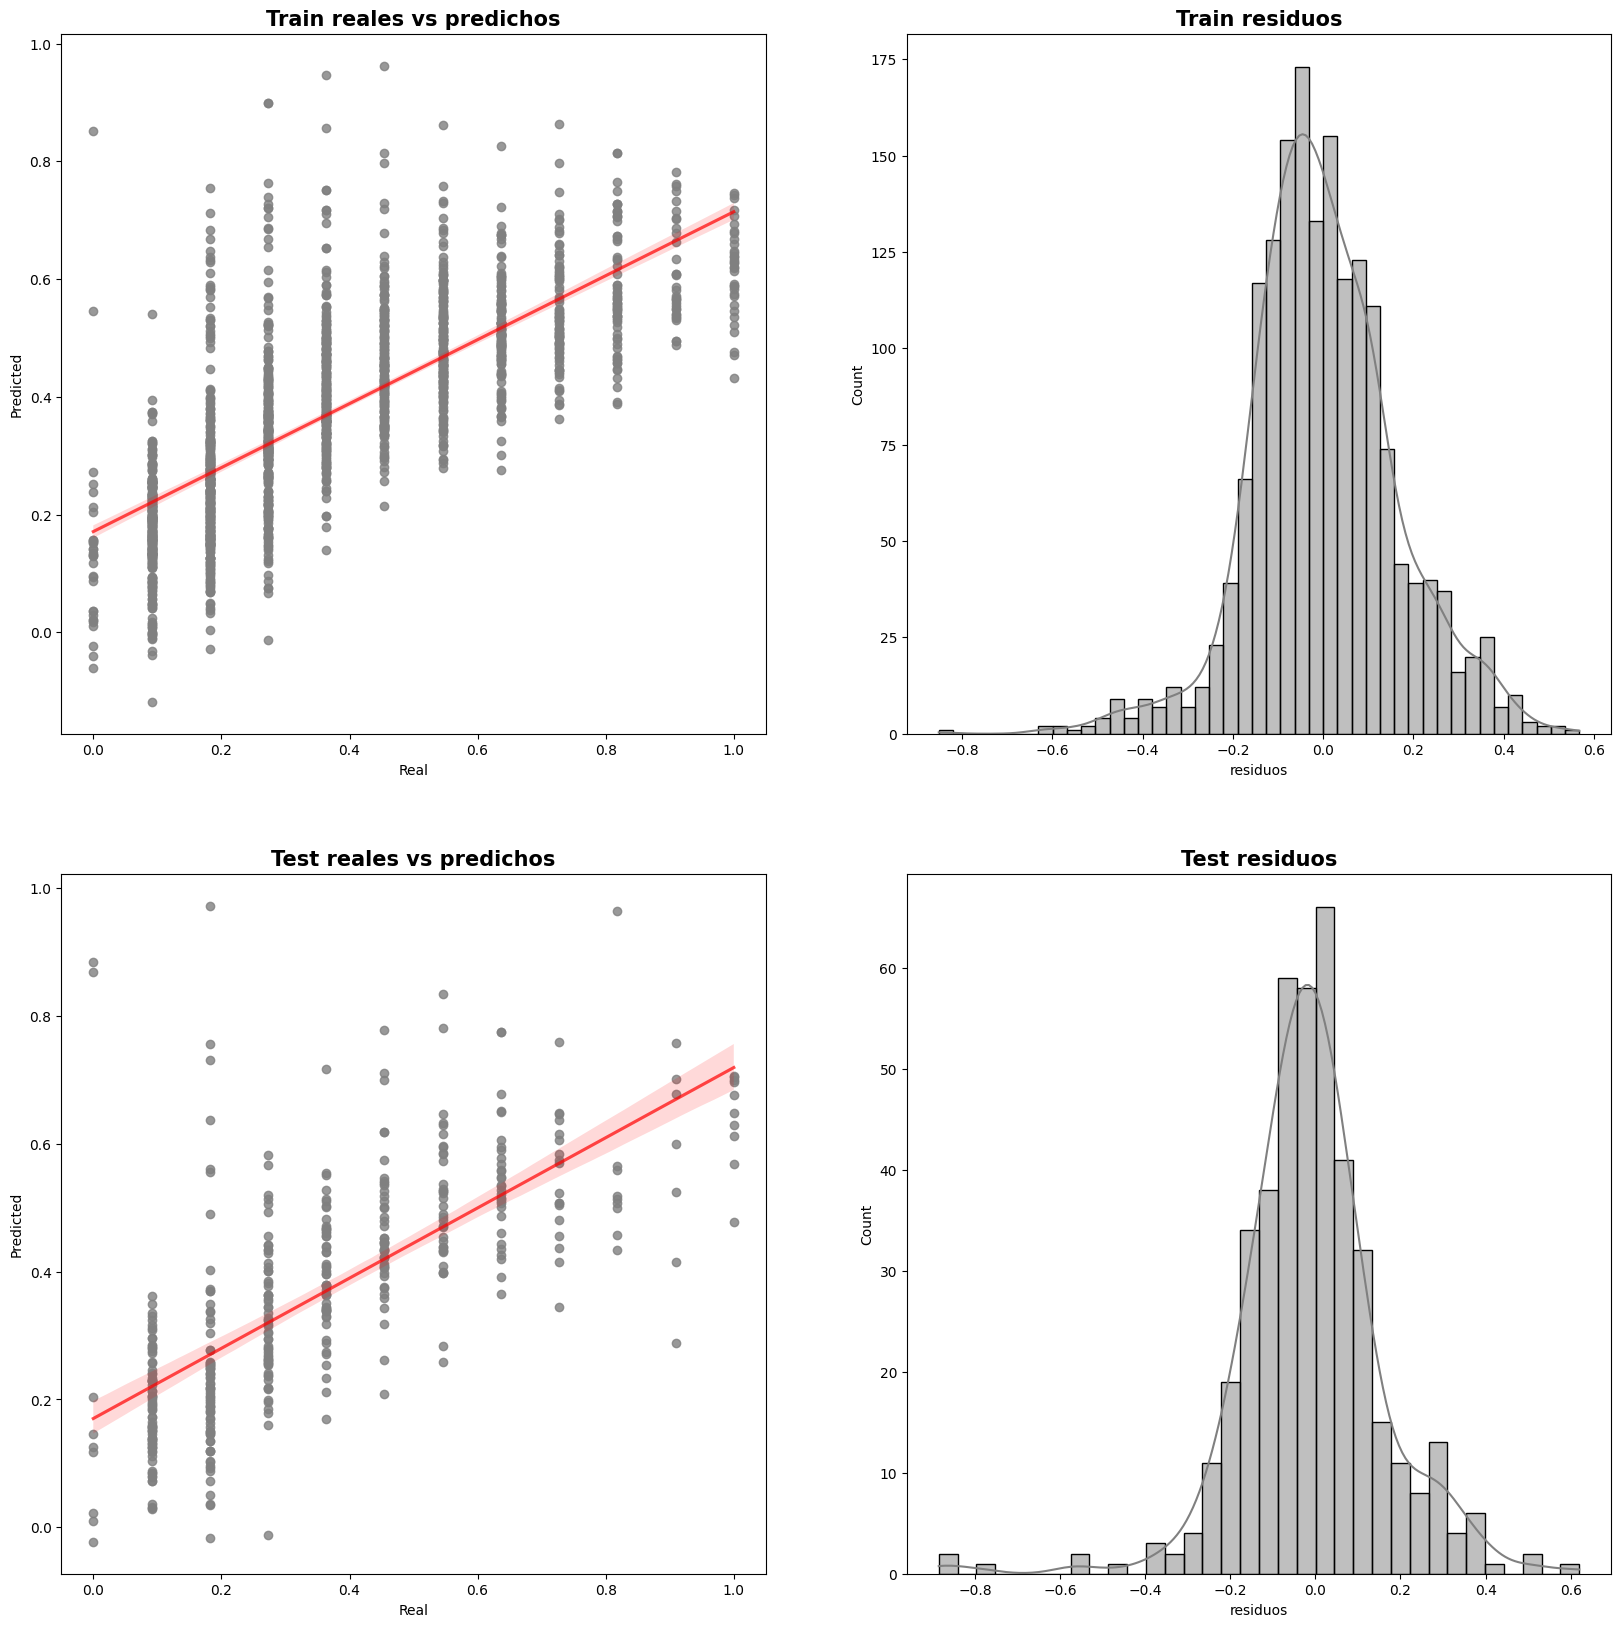

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Observando las gráficas podemos apreciar que nuestros residuos (tanto train como test) se centran alrededor del 0, siendo este el valor más elevado con diferencia y estando los valores positivos y negativos muy cercanos a éste. Podemos decir (aunque tenemos que confirmarlo de forma analítica) que la distribución de los datos en las gráficas de residuos tienen un comportamiento más o menos "normal".

Observando las gráficas lineales (tanto train como test) tomamos tres puntos de referencia: inicio, intermedio y fin. 

En el caso de la gráfica "Train reales vs Predichos" vemos que el punto 0 del eje x (realidad) está a la altura de 0.2 del eje y (predicción), por lo que llegamos a la conclusión de que la predicción supera a la realidad en el punto de partida. En un punto medio de la gráfica vemos que el punto 0.5 del eje x (realidad) está a la altura de 0.4 del eje y (predicción), por lo que lo predicho y la realidad se ajustan más que en el inicio, siendo en este caso superior la realidad a la predicción. En un punto final de la gráfica vemos que el punto 1 del eje x (realidad) está a la altura de 0.7 del eje y (predicción), por lo que la realidad supera a la predicción en el punto final. 

En el caso de la gráfica "Test reales vs Predichos" vemos que el punto 0 del eje x (realidad) está a la altura de 0.2 (un poco más bajo) del eje y (predicción), por lo que llegamos a la conclusión de que la predicción supera a la realidad en el punto de partida. En un punto medio de la gráfica vemos que el punto 0.5 del eje x (realidad) está a la altura de 0.4 (un poco por encima) del eje y (predicción), por lo que lo predicho y la realidad se ajustan más que en el inicio, siendo en este caso superior la realidad a la predicción. En un punto final de la gráfica vemos que el punto 1 del eje x (realidad) está a la altura de 0.7 del eje y (predicción), por lo que la realidad supera a la predicción en el punto final. 

En conclusión podemos observar que tanto la gráfica del entrenamiento como la del test nos dan resultados similares, al igual que los residuos de ambas partes del estudio. Necesitaremos analizar las métricas para ver si nuestra predicción es adecuada, ya que en las gráficas no podemos observar de manera precisa los datos.

### Para confirmar nuestra regresión lineal hacemos también la validación cruzada que emplea todos los datos.

In [28]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.010113,0.004901,0.513367,-0.161346
1,0.011707,0.002666,0.523005,-0.166499
2,0.007473,0.004572,0.547564,-0.161446
3,0.012506,0.010705,0.589993,-0.157501
4,0.004917,0.029834,0.585443,-0.159044
5,0.004802,0.003893,0.601321,-0.150346
6,0.014570,0.009921,0.351436,-0.185498
7,0.007436,0.017038,0.446813,-0.161666
8,0.006037,0.006769,0.527270,-0.168800
9,0.011419,0.003485,0.567803,-0.161423


In [29]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.53
la media para el RMSE es 0.16


R2 lo que nos dice que es que nuestro modelo predictivo es capaz de explicar un 53% de la variación que tiene las compras online. En cuanto el RMSE tiene un valor de 0.16 (está bastante cerca del 0), lo que nos indica que comete pocos errores en las predicciones.

En conclusión, ahora mismo vemos que nuestro modelo de regresión lineal no es muy predictivo ya que tiene un 47% de probabilidades de fallar. Nos consuela que su margen de fallo es muy bajo. Podríamos llegar a pensar en utilizar otras variables predictoras para que nuestro modelo se ajuste más o utilizar el dataframe sin estandarizar las variables predictoras.

Happy coding💪🏽